#Final-term exercise

#1. Load your libraries here:

In [1]:
#your code here:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Part 3
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

# Part 4
from sklearn.model_selection import train_test_split

# Part 5
from sklearn.preprocessing import StandardScaler

# Part 6
%pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

# Part 7
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

# Part 8
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Part 9
from sklearn.metrics import classification_report, f1_score, accuracy_score

# Part 10
from sklearn.preprocessing import MinMaxScaler

# Part 11
from sklearn.linear_model import LinearRegression

# Part 12
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Part 13
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge
import warnings
warnings.filterwarnings("ignore")

# Part 15
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from xgboost import XGBRegressor

%matplotlib inline


Note: you may need to restart the kernel to use updated packages.


2024-10-26 17:32:45.609901: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


#Part A:

#Upload your data file:

In [2]:
#your code here:
# Link to the dataset: https://www.kaggle.com/datasets/tawfikelmetwally/census-income-dataset/data?select=adult.csv

classification_df = pd.read_csv("data_for_classification/adult.csv")
classification_df.head()

,Age,Workclass,Final Weight,Education,EducationNum,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,capital loss,Hours per Week,Native Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#2. Read the file into a pandas data frame:
Split your data to:

a. X: the feature matrix

b. y: the label vector

In [3]:
#your code here:
X_classification = classification_df.drop(columns=['Income'])  
y_classification = classification_df['Income'] 

#3.A. Check for missing values:

In [4]:
#your code here:
print(f'Number of Null values: {classification_df.isnull().sum()}')

# I also checked for duplicates values and found 0 duplicates
print(f'Number of Duplicated values: {classification_df.duplicated().sum()}')

# Drop duplicates and keep only the first occurrence
classification_df = classification_df.drop_duplicates(keep='first')

Number of Null values: Age               0
Workclass         0
Final Weight      0
Education         0
EducationNum      0
Marital Status    0
Occupation        0
Relationship      0
Race              0
Gender            0
Capital Gain      0
capital loss      0
Hours per Week    0
Native Country    0
Income            0
dtype: int64
Number of Duplicated values: 24


If there are no missing values in your data, follow the next steps:
1. uncomment the following function by:

  a. selecting all the code in the chunk

  b. pressing "ctrl"+"/" to uncomment all lines
2. assign the missing values-containing data to a new variable name (see example below).

Say my dataset features is named X.

Than the use of the function would be:


```
X_missing=add_missing_values(X)
 ```






In [5]:
def add_missing_values(X_full):
    import numpy as np
    Col_names=X_full.columns
    X_full=X_full.to_numpy()
    rng = np.random.RandomState(4)
    n_samples, n_features = X_full.shape

    # Add missing values in 75% of the lines
    missing_rate = 0.75
    n_missing_samples = int(n_samples * missing_rate)

    missing_samples = np.zeros(n_samples, dtype=bool)
    missing_samples[:n_missing_samples] = True

    rng.shuffle(missing_samples)
    missing_features = rng.randint(0, n_features, n_missing_samples)
    X_missing = X_full.copy()
    X_missing[missing_samples, missing_features] = np.nan
    X_missing=pd.DataFrame(X_missing)
    X_missing.columns=Col_names
    return X_missing

X_missing = add_missing_values(X_classification)
X_missing.isnull().sum()

Age               1742
Workclass         1770
Final Weight      1770
Education         1735
EducationNum      1804
Marital Status    1718
Occupation        1645
Relationship      1764
Race              1675
Gender            1721
Capital Gain      1776
capital loss      1758
Hours per Week    1744
Native Country    1798
dtype: int64

In [6]:
#your code here, if there are no missing values:


#3.B. Impute the missing values using two different methods and assign the imputed output datasets into variables:

In [7]:
# The function add_missing_values change the data type of the columns to object,
# so we need to change it back to their original data type

# List of columns that are supposed to be numeric
numeric_columns = ['Age', 'Final Weight', 'EducationNum', 'Capital Gain', 'capital loss', 'Hours per Week']

# Convert columns to float to preserve NaN values and after inputing we will convert them back to int
X_missing[numeric_columns] = X_missing[numeric_columns].apply(pd.to_numeric, errors='coerce').astype(float)

# Check the data types to confirm
X_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             30819 non-null  float64
 1   Workclass       30791 non-null  object 
 2   Final Weight    30791 non-null  float64
 3   Education       30826 non-null  object 
 4   EducationNum    30757 non-null  float64
 5   Marital Status  30843 non-null  object 
 6   Occupation      30916 non-null  object 
 7   Relationship    30797 non-null  object 
 8   Race            30886 non-null  object 
 9   Gender          30840 non-null  object 
 10  Capital Gain    30785 non-null  float64
 11  capital loss    30803 non-null  float64
 12  Hours per Week  30817 non-null  float64
 13  Native Country  30763 non-null  object 
dtypes: float64(6), object(8)
memory usage: 3.5+ MB


In [8]:
#your code here:

# Capture the original column order
original_columns_order = X_missing.columns

# Separate numerical and categorical columns
numerical_cols = X_missing.select_dtypes(include=['float64']).columns
categorical_cols = X_missing.select_dtypes(include=['object']).columns

# 1) First Method using SimpleImputer for Numerical and Categorical Columns:

# Impute missing values for numerical columns using mean strategy
imr_mean = SimpleImputer(strategy='mean')
X_classification_filled_mean_numerical = pd.DataFrame(imr_mean.fit_transform(X_missing[numerical_cols]), columns=numerical_cols)

# Impute missing values for categorical columns using most frequent strategy
imr_mode = SimpleImputer(strategy='most_frequent')
X_classification_filled_mode_categorical = pd.DataFrame(imr_mode.fit_transform(X_missing[categorical_cols]), columns=categorical_cols)

# Combine the imputed numerical and categorical columns
X_classification_first = pd.concat([X_classification_filled_mean_numerical, X_classification_filled_mode_categorical], axis=1)

# Reorder the columns to match the original order
X_classification_first = X_classification_first[original_columns_order]

# Check for remaining missing values and display the first few rows
print('Number of missing values in the filled dataset with the first method: ', X_classification_first.isnull().sum().sum())

# 2) Second Method using KNNImputer for Numerical Columns and SimpleImputer for Categorical Columns:

# Impute numeric columns using KNNImputer
knn_imputer = KNNImputer(n_neighbors=10, weights='distance')
X_missing_numeric = pd.DataFrame(knn_imputer.fit_transform(X_missing[numerical_cols]), columns=numerical_cols)

# Impute categorical columns using SimpleImputer with 'most_frequent' strategy
imputer_categorical = SimpleImputer(strategy='most_frequent')
X_missing_categorical = pd.DataFrame(imputer_categorical.fit_transform(X_missing[categorical_cols]), columns=categorical_cols)

# Combine numeric and categorical columns back into a single DataFrame
X_classification_second = pd.concat([X_missing_numeric, X_missing_categorical], axis=1)

# Verify no missing values remain
print('Number of missing values in the filled dataset with the second method: ', X_classification_second.isnull().sum().sum())

# Reorder the columns to match the original order
X_classification_second = X_classification_second[original_columns_order]

# Comverting back to original data types
# List of columns that should be integers
numeric_columns = ['Age', 'Final Weight', 'EducationNum', 'Capital Gain', 'capital loss', 'Hours per Week']

# Convert the float64 columns back to int64 after imputation
X_classification_first[numeric_columns] = X_classification_first[numeric_columns].astype(int)
X_classification_second[numeric_columns] = X_classification_second[numeric_columns].astype(int)

Number of missing values in the filled dataset with the first method:  0
Number of missing values in the filled dataset with the second method:  0


#3.C. Convert categorical features to dummy variables if number of categories is lower than 5, otherwise remove from data.


In [9]:
#your code here:
# Both dataframes X_classification_first and X_classification_second come from the same dataframe and 
# therefore have the same columns (because we did not drop any column).

# Iterate through categorical columns and count distinct values
columns_to_remove = []
for col in categorical_cols:
    unique_values = X_missing[col].nunique()
    print(f"Distinct values in '{col}': {unique_values}")
    
    # Check if the column has more than 4 categories
    if unique_values > 4:
        print(f"Column '{col}' has more than 4 categories and should be removed.")
        columns_to_remove.append(col)
    else:
        print(f"Column '{col}' has 4 or fewer categories and can be converted to dummy variables.")

# Drop the columns with more than 4 categories
X_cleaned_first_classification = X_classification_first.drop(columns=columns_to_remove)
X_cleaned_second_classification = X_classification_second.drop(columns=columns_to_remove)

# Convert remaining categorical columns (with 4 or fewer categories) to dummy variables
X_cleaned_first_classification = pd.get_dummies(X_cleaned_first_classification, drop_first=True)
X_cleaned_second_classification = pd.get_dummies(X_cleaned_second_classification, drop_first=True)

# Step 4: Convert float64 columns back to int64 for numerical columns after imputation
X_cleaned_first_classification[numeric_columns] = X_cleaned_first_classification[numeric_columns].astype(int)
X_cleaned_second_classification[numeric_columns] = X_cleaned_second_classification[numeric_columns].astype(int)

Distinct values in 'Workclass': 9
Column 'Workclass' has more than 4 categories and should be removed.
Distinct values in 'Education': 16
Column 'Education' has more than 4 categories and should be removed.
Distinct values in 'Marital Status': 7
Column 'Marital Status' has more than 4 categories and should be removed.
Distinct values in 'Occupation': 15
Column 'Occupation' has more than 4 categories and should be removed.
Distinct values in 'Relationship': 6
Column 'Relationship' has more than 4 categories and should be removed.
Distinct values in 'Race': 5
Column 'Race' has more than 4 categories and should be removed.
Distinct values in 'Gender': 2
Column 'Gender' has 4 or fewer categories and can be converted to dummy variables.
Distinct values in 'Native Country': 42
Column 'Native Country' has more than 4 categories and should be removed.


In [10]:
X_cleaned_first_classification.describe()

,Age,Final Weight,EducationNum,Capital Gain,capital loss,Hours per Week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.539725,1.896873e+05,10.079512,1088.824883,87.143270,40.396425
std,13.253988,1.029162e+05,2.500277,7255.306415,391.407039,11.971641
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.209330e+05,9.000000,0.000000,0.000000,40.000000
50%,38.000000,1.838020e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.315730e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
X_cleaned_second_classification.describe()

,Age,Final Weight,EducationNum,Capital Gain,capital loss,Hours per Week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.555972,1.895822e+05,10.060440,1085.870612,88.045269,40.412702
std,13.356819,1.033363e+05,2.530618,7339.826176,396.259958,12.101955
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.202770e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.795080e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.339930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


As we can see on both df the values seems fine even for the columns Capitail Gain or capital loss where the min is 0 because we are talking about a gain/loss of money so it could definitely be 0

#4. Train test split:

In [12]:
#your code here:

# 1) First Imputed Dataset:
# Split the first cleaned dataset (X_cleaned_first) and target variable (y_classification)
X_train_first_classification, X_test_first_classification, y_train_first_classification, y_test_first_classification = train_test_split(
    X_cleaned_first_classification, y_classification, test_size=0.2, random_state=42)

# Check the sizes to confirm
print(f"Train set size (first): {X_train_first_classification.shape}, {y_train_first_classification.shape}")
print(f"Test set size (first): {X_test_first_classification.shape}, {y_test_first_classification.shape}")


# 2) Second Imputed Dataset:
# Split the second cleaned dataset (X_cleaned_second) and target variable (y_classification)
X_train_second_classification, X_test_second_classification, y_train_second_classification, y_test_second_classification = train_test_split(
    X_cleaned_second_classification, y_classification, test_size=0.2, random_state=42)

# Check the sizes to confirm
print(f"Train set size (second): {X_train_second_classification.shape}, {y_train_second_classification.shape}")
print(f"Test set size (second): {X_test_second_classification.shape}, {y_test_second_classification.shape}")

Train set size (first): (26048, 7), (26048,)
Test set size (first): (6513, 7), (6513,)
Train set size (second): (26048, 7), (26048,)
Test set size (second): (6513, 7), (6513,)


#5. Preprocessing (for both imputed datasets): <br>
a. standardize or normalize the data

In [13]:
#your code here:
#5.a
# Create a StandardScaler object
scaler_first = StandardScaler()
scaler_second = StandardScaler()

# Fit the scaler on the training data and transform both train and test sets
# For First Imputed Dataset
X_train_first_scaled_classification = scaler_first.fit_transform(X_train_first_classification)
X_test_first_scaled_classification = scaler_first.transform(X_test_first_classification)

# For Second Imputed Dataset
X_train_second_scaled_classification = scaler_second.fit_transform(X_train_second_classification)
X_test_second_scaled_classification = scaler_second.transform(X_test_second_classification)

b. print visual representation of the y variable (the output/label variable) or/and value counts of the two categories to test if the data is imbalanced. 

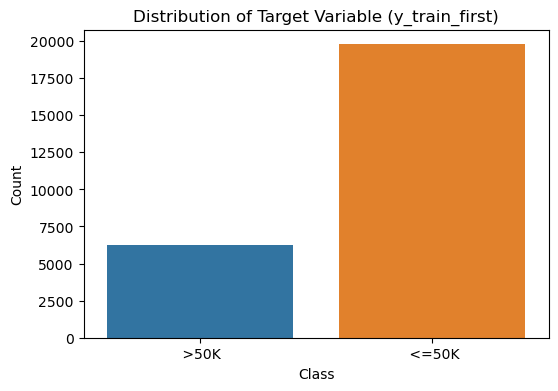

Income
<=50K    19778
>50K      6270
Name: count, dtype: int64


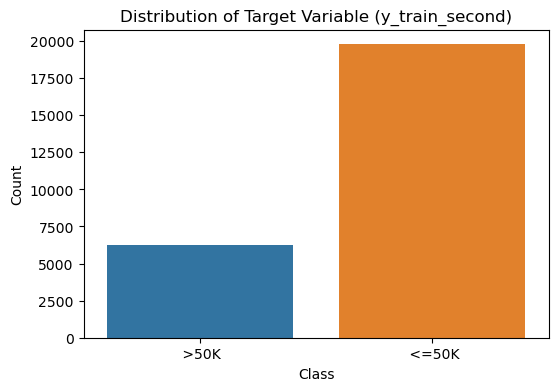

Income
<=50K    19778
>50K      6270
Name: count, dtype: int64


In [14]:
#your code here:
#5.b

# 1) First Imputed Dataset
# Plot the value counts of the target variable (y_train_first) for imbalance check
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_first_classification)
plt.title('Distribution of Target Variable (y_train_first)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Print the value counts to check for imbalance
print(y_train_first_classification.value_counts())

# 2) Second Imputed Dataset
# Plot the value counts of the target variable (y_train_second) for imbalance check
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_second_classification)
plt.title('Distribution of Target Variable (y_train_second)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Print the value counts to check for imbalance
print(y_train_second_classification.value_counts())

#6. Choose one balancing method and perform it on your data.

Verbally explain the logic behind the chosen balancing metohd, how does it work?

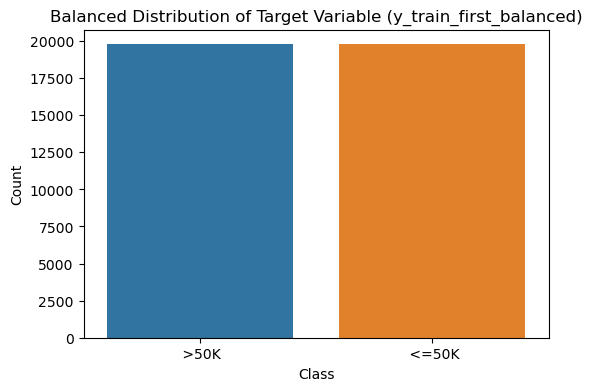

Value counts for y_train_first_balanced:
Income
>50K     19778
<=50K    19778
Name: count, dtype: int64


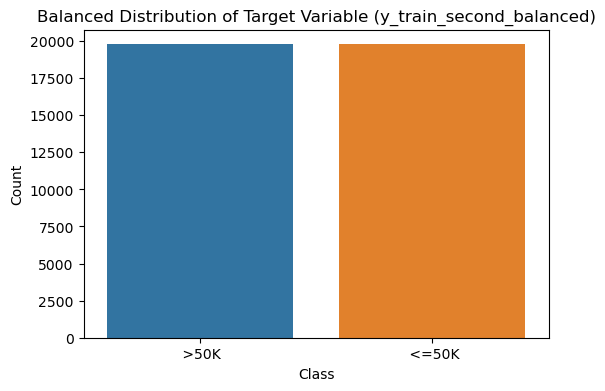

Value counts for y_train_second_balanced:
Income
>50K     19778
<=50K    19778
Name: count, dtype: int64


In [15]:
#your code here, if balancing is requierd:

# 1) First Imputed Dataset
# Create an instance of SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_first_balanced_classification, y_train_first_balanced_classification = smote.fit_resample(X_train_first_scaled_classification, y_train_first_classification)

# Visualize the new balanced dataset
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_first_balanced_classification)
plt.title('Balanced Distribution of Target Variable (y_train_first_balanced)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Print the value counts of the balanced dataset
print("Value counts for y_train_first_balanced:")
print(y_train_first_balanced_classification.value_counts())

# 2) Second Imputed Dataset
# Create an instance of SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_second_balanced_classification, y_train_second_balanced_classification = smote.fit_resample(X_train_second_scaled_classification, y_train_second_classification)

# Visualize the new balanced dataset
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_second_balanced_classification)
plt.title('Balanced Distribution of Target Variable (y_train_second_balanced)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Print the value counts of the balanced dataset
print("Value counts for y_train_second_balanced:")
print(y_train_second_balanced_classification.value_counts())

#Your answer here: <br>
Balancing the data was necessary because the dataset was imbalanced (for 'Income' = '<=50K': 19778 values
and for 'Income' = '>50K': 6270 values), which can bias the model for predicting the class majority class. We chose SMOTE because it generates synthetic samples for the minority class and therefor avoid overfitting that can occur with simple duplication. The SMOTE method ensures that the minority class is represented enough and therefore it improve the model's overall performance. SMOTE is effective when we have an imbalance data and when preventing overfitting is a priority.


#7. Training models (for both imputed datasets): <br>
**a.** choose three classification algorithms, two must be either random forest or XGBoost or catboost or LGBM, and apply the algorithms on the train set.  <br>

**b.** apply hyperparameter tuning on at least two algorithms using gridsearchCV function.<br>

**c.** print the best hyperparameters for the three models.

Reminder, if the tuned model is named "grid" than to get the best hyperparameter combination use the following function:


```
grid.best_params_
```


**d.** Veraverbally explain: what is the role of the chosen hyperparmeters in the learning algorithms? How did you choose the values for the optimization? (in 3-4 lines)


In [16]:
#your code here:
# Initialize the LabelEncoder
label_encoder_first = LabelEncoder()
label_encoder_second = LabelEncoder()

# Convert the target variable y_train and y_test to numeric values
y_train_first_encoded_classification = label_encoder_first.fit_transform(y_train_first_balanced_classification)
y_test_first_encoded_classification = label_encoder_first.transform(y_test_first_classification)

# Convert the target variable y_train and y_test to numeric values
y_train_second_encoded_classification = label_encoder_second.fit_transform(y_train_second_balanced_classification)
y_test_second_encoded_classification = label_encoder_second.transform(y_test_second_classification)


# 7.a
# Parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
}

# Parameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
}

# Parameter grid for HistGradientBoostingClassifier
hgb_param_grid = {
    'max_iter': [100, 200],
    'max_depth': [3, 6]
}

# 7.a - For the first dataset
# Create Random Forest model for the first dataset
rf_first = RandomForestClassifier(random_state=42)
rf_grid_first = GridSearchCV(estimator=rf_first, param_grid=rf_param_grid, cv=3)
rf_grid_first.fit(X_train_first_balanced_classification, y_train_first_encoded_classification)

# Create XGBoost model for the first dataset
xgb_first = XGBClassifier(random_state=42, eval_metric='mlogloss')
xgb_grid_first = GridSearchCV(estimator=xgb_first, param_grid=xgb_param_grid, cv=3)
xgb_grid_first.fit(X_train_first_balanced_classification, y_train_first_encoded_classification)

# Create HistGradientBoostingClassifier model for the first dataset
hgb_first = HistGradientBoostingClassifier(random_state=42)
hgb_grid_first = GridSearchCV(estimator=hgb_first, param_grid=hgb_param_grid, cv=3)
hgb_grid_first.fit(X_train_first_balanced_classification, y_train_first_encoded_classification)

# Best parameters for the first dataset models
print("Best parameters for Random Forest (first):", rf_grid_first.best_params_)
print("Best parameters for XGBoost (first):", xgb_grid_first.best_params_)
print("Best parameters for HistGradientBoostingClassifier (first):", hgb_grid_first.best_params_)


# 7.b - For the second dataset
# Create Random Forest model for the second dataset
rf_second = RandomForestClassifier(random_state=42)
rf_grid_second = GridSearchCV(estimator=rf_second, param_grid=rf_param_grid, cv=3)
rf_grid_second.fit(X_train_second_balanced_classification, y_train_second_encoded_classification)

# Create XGBoost model for the second dataset
xgb_second = XGBClassifier(random_state=42, eval_metric='mlogloss')
xgb_grid_second = GridSearchCV(estimator=xgb_second, param_grid=xgb_param_grid, cv=3)
xgb_grid_second.fit(X_train_second_balanced_classification, y_train_second_encoded_classification)

# Create HistGradientBoostingClassifier model for the second dataset
hgb_second = HistGradientBoostingClassifier(random_state=42)
hgb_grid_second = GridSearchCV(estimator=hgb_second, param_grid=hgb_param_grid, cv=3)
hgb_grid_second.fit(X_train_second_balanced_classification, y_train_second_encoded_classification)

# Best parameters for the second dataset models
print("Best parameters for Random Forest (second):", rf_grid_second.best_params_)
print("Best parameters for XGBoost (second):", xgb_grid_second.best_params_)
print("Best parameters for HistGradientBoostingClassifier (second):", hgb_grid_second.best_params_)


Best parameters for Random Forest (first): {'max_depth': None, 'n_estimators': 200}
Best parameters for XGBoost (first): {'max_depth': 6, 'n_estimators': 200}
Best parameters for HistGradientBoostingClassifier (first): {'max_depth': 6, 'max_iter': 200}
Best parameters for Random Forest (second): {'max_depth': None, 'n_estimators': 200}
Best parameters for XGBoost (second): {'max_depth': 6, 'n_estimators': 200}
Best parameters for HistGradientBoostingClassifier (second): {'max_depth': 6, 'max_iter': 200}


For Random Forest, n_estimators controls the number of trees in the forest which affect accuracy and computation time,max_depth limits the tree depth which allow a blance between complexity and overfitting risk. For XGBoost, learning_rate manages how much each tree contributes where smaller values reduce overfitting but require more trees, and n_estimators defines the number of boosting rounds. In HistGradientBoostingClassifier, max_iter determines the number of boosting iterations, and learning_rate affects the speed of learning and generalization.

#Your answer here:



#8. Train a neural network on both imputed datasets.

In [17]:
#your code here:
# 1) First Method

# Define the model architecture
model_first = Sequential()
model_first.add(Dense(64, input_dim=X_train_first_balanced_classification.shape[1], activation='relu'))
model_first.add(Dense(32, activation='relu'))
model_first.add(Dropout(0.5))  # Dropout to prevent overfitting
model_first.add(Dense(16, activation='relu'))
model_first.add(Dense(1, activation='sigmoid'))

# Compile the model
model_first.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_first = model_first.fit(X_train_first_balanced_classification, y_train_first_encoded_classification, epochs=50, batch_size=32, validation_split=0.2)

# Summary of the model
model_first.summary()

# 2) Second Method
# Define the model architecture
model_second = Sequential()
model_second.add(Dense(64, input_dim=X_train_second_balanced_classification.shape[1], activation='relu'))
model_second.add(Dense(32, activation='relu'))
model_second.add(Dropout(0.5))  # Dropout to prevent overfitting
model_second.add(Dense(16, activation='relu'))
model_second.add(Dense(1, activation='sigmoid'))

# Compile the model
model_second.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_second = model_second.fit(X_train_second_balanced_classification, y_train_second_encoded_classification, epochs=50, batch_size=32, validation_split=0.2)

# Summary of the model
model_second.summary()

Epoch 1/50
989/989 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7448 - loss: 0.5228 - val_accuracy: 0.6429 - val_loss: 0.6703
Epoch 2/50
989/989 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7766 - loss: 0.4537 - val_accuracy: 0.6576 - val_loss: 0.6373
Epoch 3/50
989/989 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7802 - loss: 0.4530 - val_accuracy: 0.6704 - val_loss: 0.6035
Epoch 4/50
989/989 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7820 - loss: 0.4517 - val_accuracy: 0.6816 - val_loss: 0.5852
Epoch 5/50
989/989 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7837 - loss: 0.4457 - val_accuracy: 0.6831 - val_loss: 0.5913
Epoch 6/50
989/989 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7835 - loss: 0.4468 - val_accuracy: 0.6720 - val_loss: 0.5985
Epoch 7/50
989/989 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7831 - loss: 0.4513 - val_accuracy: 0.6764 - val_loss: 0.6039
Epoch 8/50
989/989 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7795 - loss: 0.4502 - val_accuracy: 0.

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,413 (36.77 KB)

 Trainable params: 3,137 (12.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,276 (24.52 KB)

Epoch 1/50
989/989 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7426 - loss: 0.5201 - val_accuracy: 0.6204 - val_loss: 0.6275
Epoch 2/50
989/989 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7750 - loss: 0.4606 - val_accuracy: 0.6721 - val_loss: 0.6062
Epoch 3/50
989/989 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7782 - loss: 0.4582 - val_accuracy: 0.6134 - val_loss: 0.6512
Epoch 4/50
989/989 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7799 - loss: 0.4518 - val_accuracy: 0.6946 - val_loss: 0.5980
Epoch 5/50
989/989 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7787 - loss: 0.4506 - val_accuracy: 0.6502 - val_loss: 0.6347
Epoch 6/50
989/989 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7794 - loss: 0.4504 - val_accuracy: 0.7204 - val_loss: 0.5678
Epoch 7/50
989/989 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7860 - loss: 0.4448 - val_accuracy: 0.7132 - val_loss: 0.5409
Epoch 8/50
989/989 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7836 - loss: 0.4419 - val_accuracy: 0.

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,413 (36.77 KB)

 Trainable params: 3,137 (12.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,276 (24.52 KB)

#Explain the structure of the network: how many layers? what layers? how manny weights/coefficients/parameters are there in your network? (2-3 sentences)

#Your answer here: <br>
Both neural network consists of 4 layers: three hidden layers and one output layer. The first hidden layer has 64 neurons, the second 32 and the last one 16 neurons, using ReLU activation functions. We also used A dropout layer with a rate of 0.5 for preventing overfitting. The output layer has 1 neuron with a sigmoid activation function for binary classification. In total, the network has 9,413 parameters where 3,137 are trainable, and 6,276 are related to the optimizer parameters.

#9. a. Predict the y variable on both the train set and the test set (for both imputed datasets and for both algorithms - 16 predictions in total):
2 imputed datasets * 4 models * (train+test)

and print the accuracy of each prediction.



In [20]:
models = {
    "Random Forest": [rf_grid_first, rf_grid_second],
    "XGBoost": [xgb_grid_first, xgb_grid_second],
    "HistGradientBoosting": [hgb_grid_first, hgb_grid_second],
    "Neural Network": [model_first, model_second]  # Assuming Keras models for both datasets
}

imputed_datasets = ["First Imputed Dataset", "Second Imputed Dataset"]
label_encoders = [label_encoder_first, label_encoder_second]
X_train_sets_classification = [X_train_first_balanced_classification, X_train_second_balanced_classification]
X_test_sets_classification = [X_test_first_scaled_classification, X_test_second_scaled_classification]
y_train_sets_classification = [y_train_first_encoded_classification, y_train_second_encoded_classification]
y_test_sets_classification = [y_test_first_encoded_classification, y_test_second_encoded_classification]


def evaluate_models(models, imputed_datasets, label_encoders, X_train_sets, X_test_sets, y_train_sets, y_test_sets):
    # Predicting on both train and test for each model and imputed dataset
    for dataset_idx, dataset_name in enumerate(imputed_datasets):
        label_encoder = label_encoders[dataset_idx]
        X_train_classification = X_train_sets[dataset_idx]
        X_test_classification = X_test_sets[dataset_idx]
        y_train_classification = y_train_sets[dataset_idx]
        y_test_classification = y_test_sets[dataset_idx]

        for model_name, model_variants in models.items():
            model = model_variants[dataset_idx]
            
            if model_name == "Neural Network":
                # Neural network models have different predict method
                y_train_pred_classification = (model.predict(X_train_classification) > 0.5).astype("int32")
                y_test_pred_classification = (model.predict(X_test_classification) > 0.5).astype("int32")
            else:
                y_train_pred_classification = model.predict(X_train_classification)
                y_test_pred_classification = model.predict(X_test_classification)

            # Only apply inverse transformation to predictions
            y_train_pred_classification = label_encoder.inverse_transform(y_train_pred_classification)
            y_test_pred_classification = label_encoder.inverse_transform(y_test_pred_classification)

            # Print accuracy with bold model name
            print(f"\033[1m{model_name}:\033[0m")
            print(f"Accuracy for {model_name} on {dataset_name} - Train Set: {accuracy_score(label_encoder.inverse_transform(y_train_classification), y_train_pred_classification)}")
            print(f"Accuracy for {model_name} on {dataset_name} - Test Set: {accuracy_score(label_encoder.inverse_transform(y_test_classification), y_test_pred_classification)}")
            print()

evaluate_models(models, imputed_datasets, label_encoders, X_train_sets_classification, X_test_sets_classification, y_train_sets_classification, y_test_sets_classification)


Random Forest:
Accuracy for Random Forest on First Imputed Dataset - Train Set: 0.9981292345029831
Accuracy for Random Forest on First Imputed Dataset - Test Set: 0.7931828650391525

XGBoost:
Accuracy for XGBoost on First Imputed Dataset - Train Set: 0.897689351805036
Accuracy for XGBoost on First Imputed Dataset - Test Set: 0.8192845079072624

HistGradientBoosting:
Accuracy for HistGradientBoosting on First Imputed Dataset - Train Set: 0.8640914147032056
Accuracy for HistGradientBoosting on First Imputed Dataset - Test Set: 0.8037770612620913

1237/1237 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Neural Network:
Accuracy for Neural Network on First Imputed Dataset - Train Set: 0.7643088279906968
Accuracy for Neural Network on First Imputed Dataset - Test Set: 0.8165208045447566

Random Forest:
Accuracy for Random Forest on Second Imputed Dataset - Train Set: 0.9980281120436849
Accuracy for Random Forest on Second Imputed Dataset - Test Set: 0.789805005373

#b. Based on the accuracies of the predictions, verbally explain which model resulted with the best outcome with consideration to over-fitting, under-fitting and proper-fitting.

#Your answer here:
Based on the accuracies, XGBoost provided the best outcome, and show good performance between on both training set (> 89%) and test set (>81%), which indicate proper-fitting and generalization. Random Forest showed  overfitting with very high training accuracy on both sets (>99%) compared to test accuracy (>78%). HistGradientBoosting also showed balanced fitting but with a bit less effective accuracies than XGBoost. The Neural Network showed potential underfitting with a lower training accuracy on both sets (>76%) compared to test accuracy (>79%), suggesting that it may benefit from more training.

#Print the classification_report of the test set using the best model and verbally explain another quality measure of your choice.

In [21]:
# Function to print F1 scores for train and test sets for any model
def print_f1_scores(model, X_train, y_train, X_test, y_test, label_encoder, is_neural_network=False):
    # Predict for train and test sets
    if is_neural_network:
        y_train_pred = (model.predict(X_train) > 0.5).astype("int32")
        y_test_pred = (model.predict(X_test) > 0.5).astype("int32")
    else:
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

    # Reverse label encoding for interpretation
    y_train = label_encoder.inverse_transform(y_train)
    y_test = label_encoder.inverse_transform(y_test)
    y_train_pred = label_encoder.inverse_transform(y_train_pred)
    y_test_pred = label_encoder.inverse_transform(y_test_pred)

    # Calculate F1 scores
    f1_train = f1_score(y_train, y_train_pred, average='weighted')
    f1_test = f1_score(y_test, y_test_pred, average='weighted')

    print(f"F1 Score on Train Set: {f1_train}")
    print(f"F1 Score on Test Set: {f1_test}")

# Function to print classification report for the best models only
def print_classification_report(model, X_test, y_test, label_encoder, is_neural_network=False):
    # Predict for train and test sets
    if is_neural_network:
        y_test_pred = (model.predict(X_test) > 0.5).astype("int32")
    else:
        y_test_pred = model.predict(X_test)

    # Reverse label encoding for interpretation
    y_test = label_encoder.inverse_transform(y_test)
    y_test_pred = label_encoder.inverse_transform(y_test_pred)

    # Print classification report
    print("Classification Report on Test Set:")
    print(classification_report(y_test, y_test_pred))


# Models and label encoders
models = {
    "Random Forest": [rf_grid_first, rf_grid_second],
    "XGBoost": [xgb_grid_first, xgb_grid_second],
    "HistGradientBoosting": [hgb_grid_first, hgb_grid_second],
    "Neural Network": [model_first, model_second]  # Assuming Keras models for both datasets
}

# Print F1 scores for each model
print("F1 Scores for All Models:\n")
for model_name, model_variants in models.items():
    for dataset_idx, model in enumerate(model_variants):
        print(f"{model_name} - {'First' if dataset_idx == 0 else 'Second'} Imputed Dataset")
        label_encoder = label_encoders[dataset_idx]
        X_train = X_train_sets_classification[dataset_idx]
        X_test = X_test_sets_classification[dataset_idx]
        y_train = y_train_sets_classification[dataset_idx]
        y_test = y_test_sets_classification[dataset_idx]

        is_neural_network = model_name == "Neural Network"
        print_f1_scores(model, X_train, y_train, X_test, y_test, label_encoder, is_neural_network)
        print("\n" + "-"*50 + "\n")

# Print classification report for the best models only
best_models = [xgb_grid_first, xgb_grid_second]
print("Classification Report for Best Models (XGBoost):\n")
for i, model in enumerate(best_models):
    label_encoder = label_encoders[i]
    X_test = X_test_sets_classification[i]
    y_test = y_test_sets_classification[i]
    
    print(f"Classification Report for {'First' if i == 0 else 'Second'} Imputed Dataset:")
    print_classification_report(model, X_test, y_test, label_encoder)
    print("\n" + "="*50 + "\n")

F1 Scores for All Models:

Random Forest - First Imputed Dataset
F1 Score on Train Set: 0.9981292342686409
F1 Score on Test Set: 0.794084125843399

--------------------------------------------------

Random Forest - Second Imputed Dataset
F1 Score on Train Set: 0.9980281117210603
F1 Score on Test Set: 0.7916616472075105

--------------------------------------------------

XGBoost - First Imputed Dataset
F1 Score on Train Set: 0.897652459775552
F1 Score on Test Set: 0.8201470834086527

--------------------------------------------------

XGBoost - Second Imputed Dataset
F1 Score on Train Set: 0.8977820764981156
F1 Score on Test Set: 0.8187857366885654

--------------------------------------------------

HistGradientBoosting - First Imputed Dataset
F1 Score on Train Set: 0.8640877285924949
F1 Score on Test Set: 0.8086570282605945

--------------------------------------------------

HistGradientBoosting - Second Imputed Dataset
F1 Score on Train Set: 0.8674505809783183
F1 Score on Test Set

#Your answer here: <br>
Based on the F1 score, the XGBoost model still demonstrated the best performance on both the training and test sets. The F1 score is a good metric and relevant to the world of the content of our prediction question because it balances precision and recall and effectively evaluates model performance in cases of class imbalance. Since we used SMOTE to create synthetic examples for the minority class, the F1 score provides a better indication of how well our model learned to handle the minority class after balancing and therefore this metric is more reliable than accuracy for our prediction task, where identifying both classes accurately is essential.

#Part B:

#10. Data preprocessing:

#Upload the second table (for regression analysis):

In [22]:
#your code here:
# Link to the dataset: https://www.kaggle.com/datasets/anmolkumar/house-price-prediction-challenge?select=train.csv
# Load the full dataset
regression_df = pd.read_csv("data_for_regression/train.csv")

# We will Randomly sample 5000 rows with a fixed random_state because the dataset is too large
regression_df = regression_df.sample(n=1500, random_state=42)
regression_df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
21992,Dealer,0,0,3,BHK,1057.896332,1,1,"Nayabad,Kolkata",22.483471,88.417711,34.9
29060,Dealer,0,0,3,BHK,1340.588282,1,1,"Sector 42 Seawoods,Lalitpur",28.456809,77.099182,170.0
6778,Dealer,0,0,2,BHK,800.000000,1,1,"Indirapuram,Ghaziabad",28.636760,77.363150,35.0
4730,Owner,0,0,3,BHK,1800.327332,1,1,"Navratna Complex,Udaipur",24.583330,73.683330,55.0
28825,Dealer,1,0,2,BHK,903.024911,0,1,"Madhyamgram,Kolkata",22.700000,88.450000,20.3


#Read the file into a pandas data frame:
Split your data to:

a. X: the feature matrix

b. y: the label vector

In [23]:
#your code here:
X_regression = regression_df.drop(columns=['TARGET(PRICE_IN_LACS)'])
y_regression = regression_df['TARGET(PRICE_IN_LACS)']

#10.A. Check for missing values:

In [24]:
#your code here:
print(f'Number of Null values: {regression_df.isnull().sum()}')

# I also checked for duplicates values and found 14 duplicates
print(f'Number of Duplicated values: {regression_df.duplicated().sum()}')

# Drop duplicates and keep only the first occurrence
regression_df = regression_df.drop_duplicates(keep='first')

Number of Null values: POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64
Number of Duplicated values: 0


#10.B. Impute the missing values using two different methods and assign the imputed output datasets into variables:

In [25]:
#your code here:
#None of the columns have missing values, so we can proceed with the next steps.

#10.C. Convert categorical features to dummy variables if number of categories is lower than 5, otherwise remove from data.


In [26]:
#your code here:
# Iterate through categorical columns and count distinct values
numerical_cols_1 = X_regression.select_dtypes(include=['int64']).columns
categorical_cols_1 = X_regression.select_dtypes(include=['object']).columns

columns_to_remove_1 = []
for col in categorical_cols_1:
    unique_values = X_regression[col].nunique()
    print(f"Distinct values in '{col}': {unique_values}")
    
    # Check if the column has more than 4 categories
    if unique_values > 4:
        print(f"Column '{col}' has more than 4 categories and should be removed.")
        columns_to_remove_1.append(col)
    else:
        print(f"Column '{col}' has 4 or fewer categories and can be converted to dummy variables.")

# Drop the columns with more than 4 categories
X_cleaned_regression = X_regression.drop(columns=columns_to_remove_1)

# Convert remaining categorical columns (with 4 or fewer categories) to dummy variables
X_cleaned_regression = pd.get_dummies(X_cleaned_regression, drop_first=True)

X_cleaned_regression.head()


Distinct values in 'POSTED_BY': 3
Column 'POSTED_BY' has 4 or fewer categories and can be converted to dummy variables.
Distinct values in 'BHK_OR_RK': 2
Column 'BHK_OR_RK' has 4 or fewer categories and can be converted to dummy variables.
Distinct values in 'ADDRESS': 1021
Column 'ADDRESS' has more than 4 categories and should be removed.


,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,POSTED_BY_Dealer,POSTED_BY_Owner,BHK_OR_RK_RK
21992,0,0,3,1057.896332,1,1,22.483471,88.417711,True,False,False
29060,0,0,3,1340.588282,1,1,28.456809,77.099182,True,False,False
6778,0,0,2,800.000000,1,1,28.636760,77.363150,True,False,False
4730,0,0,3,1800.327332,1,1,24.583330,73.683330,False,True,False
28825,1,0,2,903.024911,0,1,22.700000,88.450000,True,False,False


In [27]:
X_cleaned_regression.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE
count,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.186000,0.299333,2.38000,2039.983887,0.814000,0.930667,21.285463,77.132794
std,0.389236,0.458119,0.80666,11162.639675,0.389236,0.254105,6.092555,8.893045
min,0.000000,0.000000,1.00000,32.000000,0.000000,0.000000,9.182037,-86.152929
25%,0.000000,0.000000,2.00000,900.186468,1.000000,1.000000,18.461698,73.804299
50%,0.000000,0.000000,2.00000,1182.401299,1.000000,1.000000,20.534403,77.304492
75%,0.000000,1.000000,3.00000,1531.656049,1.000000,1.000000,26.867658,77.774248
max,1.000000,1.000000,8.00000,230000.000000,1.000000,1.000000,52.556894,136.000000


#10.D. Train test split:

In [28]:
#your code here:

# 1) First Imputed Dataset:
X_train_regression, X_test_regression, y_train_regression, y_test_regression = train_test_split(
    X_cleaned_regression, y_regression, test_size=0.2, random_state=42)

# Check the sizes to confirm
print(f"Train set size (first): {X_train_regression.shape}, {y_train_regression.shape}")
print(f"Test set size (first): {X_test_regression.shape}, {y_test_regression.shape}")

Train set size (first): (1200, 11), (1200,)
Test set size (first): (300, 11), (300,)


#10.E. standardize or normalize the data

  

In [29]:
#your code here:
# Create a MinMaxScaler object
scaler_first = MinMaxScaler()

# Fit the scaler on the training data and transform both train and test sets
X_train_normalized_regression = scaler_first.fit_transform(X_train_regression)
X_test_normalized_regression = scaler_first.transform(X_test_regression)

#11. Train a linear regression model:

In [30]:
#your code here:
# Initialize the Linear Regression model
linear_regression_model = LinearRegression()

# Train the model on the normalized training set
linear_regression_model.fit(X_train_normalized_regression, y_train_regression)

LinearRegression()

#12. On both the train set and the test set, predict the values based on the linear regression model and print the following measures:

	*  R^2
	*  Root Mean Square Error (RMSE)
	*  Mean Absolut Error (MAE)
	*  Mean Absolut Percent Error (MAPE)



In [31]:
#your code here:
# Function to calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Predict on train and test sets
y_train_pred_regression = linear_regression_model.predict(X_train_normalized_regression)
y_test_pred_regression = linear_regression_model.predict(X_test_normalized_regression)

# Calculate metrics for the train set
print("Train Set Metrics:")
r2_train = r2_score(y_train_regression, y_train_pred_regression)
rmse_train = np.sqrt(mean_squared_error(y_train_regression, y_train_pred_regression))
mae_train = mean_absolute_error(y_train_regression, y_train_pred_regression)
mape_train = mean_absolute_percentage_error(y_train_regression, y_train_pred_regression)

print(f"R^2: {r2_train}")
print(f"Root Mean Square Error (RMSE): {rmse_train}")
print(f"Mean Absolute Error (MAE): {mae_train}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_train}")

# Calculate metrics for the test set
print("\nTest Set Metrics:")
r2_test = r2_score(y_test_regression, y_test_pred_regression)
rmse_test = np.sqrt(mean_squared_error(y_test_regression, y_test_pred_regression))
mae_test = mean_absolute_error(y_test_regression, y_test_pred_regression)
mape_test = mean_absolute_percentage_error(y_test_regression, y_test_pred_regression)

print(f"R^2: {r2_test}")
print(f"Root Mean Square Error (RMSE): {rmse_test}")
print(f"Mean Absolute Error (MAE): {mae_test}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_test}")

Train Set Metrics:
R^2: 0.06557754241865377
Root Mean Square Error (RMSE): 392.33133497083816
Mean Absolute Error (MAE): 202.45583333333332
Mean Absolute Percentage Error (MAPE): 364.68299641192425

Test Set Metrics:
R^2: 0.3713581211604169
Root Mean Square Error (RMSE): 633.8240863467823
Mean Absolute Error (MAE): 231.02700000000002
Mean Absolute Percentage Error (MAPE): 314.4221436509358


Overall, these metrics shows that the model is not learning well the relationship between the features and the target. The low R² values and high errors (RMSE, MAE, MAPE) suggest us that the linear regression model can be not be not a good for this dataset.

#13. Polynomial regression: follow instruction in the attached documnet.

In [32]:
#your code here:
# Define polynomial degrees to try
degrees = [2, 3, 4]
best_model = None
best_degree = None
best_alpha = None
best_score = float('-inf')

# Loop through each degree
for d in degrees:
    print(f"\nDegree: {d}")
    # Generate polynomial features
    poly = PolynomialFeatures(degree=d)
    X_poly = poly.fit_transform(X_cleaned_regression)
    
    # Split the data with the same random state
    X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(
        X_poly, y_regression, test_size=0.2, random_state=42)
    
    # Define the parameter grid for alpha
    param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
    
    # Lasso Regression with GridSearchCV
    print("Lasso Regression")
    lasso = Lasso(max_iter=10000)
    lasso_grid = GridSearchCV(lasso, param_grid, cv=3, scoring='r2')
    lasso_grid.fit(X_train_poly, y_train_poly)
    
    # Ridge Regression with GridSearchCV
    print("Ridge Regression")
    ridge = Ridge(max_iter=10000)
    ridge_grid = GridSearchCV(ridge, param_grid, cv=3, scoring='r2')
    ridge_grid.fit(X_train_poly, y_train_poly)
    
    # Determine best model and parameters for current degree
    best_lasso_score = lasso_grid.best_score_
    best_ridge_score = ridge_grid.best_score_
    
    if best_lasso_score > best_score:
        best_score = best_lasso_score
        best_model = lasso_grid.best_estimator_
        best_degree = d
        best_alpha = lasso_grid.best_params_['alpha']
    
    if best_ridge_score > best_score:
        best_score = best_ridge_score
        best_model = ridge_grid.best_estimator_
        best_degree = d
        best_alpha = ridge_grid.best_params_['alpha']

# Display the best model details
print(f"Best Degree: {best_degree}")
print(f"Best Model: {'Lasso' if isinstance(best_model, Lasso) else 'Ridge'}")
print(f"Best Alpha: {best_alpha}")


# Initialize PolynomialFeatures with the best degree found (e.g., degree=d)
poly = PolynomialFeatures(degree=best_degree)

# Transform the entire dataset, then split
X_poly = poly.fit_transform(X_cleaned_regression)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(
    X_poly, y_regression, test_size=0.2, random_state=42)

# Now you can train and test using the transformed sets with consistent feature numbers
y_train_pred = best_model.predict(X_train_poly)
y_test_pred = best_model.predict(X_test_poly)

# Calculate and display metrics for train set
print("\nTrain Set Metrics:")
print(f"R^2: {r2_score(y_train_poly, y_train_pred)}")
print(f"Root Mean Square Error (RMSE): {np.sqrt(mean_squared_error(y_train_poly, y_train_pred))}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_train_poly, y_train_pred)}")
print(f"Mean Absolute Percentage Error (MAPE): {mean_absolute_percentage_error(y_train_poly, y_train_pred)}")

# Calculate and display metrics for test set
print("\nTest Set Metrics:")
print(f"R^2: {r2_score(y_test_poly, y_test_pred)}")
print(f"Root Mean Square Error (RMSE): {np.sqrt(mean_squared_error(y_test_poly, y_test_pred))}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test_poly, y_test_pred)}")
print(f"Mean Absolute Percentage Error (MAPE): {mean_absolute_percentage_error(y_test_poly, y_test_pred)}")



Degree: 2
Lasso Regression
Ridge Regression

Degree: 3
Lasso Regression
Ridge Regression

Degree: 4
Lasso Regression
Ridge Regression
Best Degree: 2
Best Model: Lasso
Best Alpha: 100

Train Set Metrics:
R^2: 0.9305547742140763
Root Mean Square Error (RMSE): 106.95536136031029
Mean Absolute Error (MAE): 52.385538639276845
Mean Absolute Percentage Error (MAPE): 68.46889573038459

Test Set Metrics:
R^2: 0.8083572559718445
Root Mean Square Error (RMSE): 349.95586363147584
Mean Absolute Error (MAE): 76.74764989496427
Mean Absolute Percentage Error (MAPE): 64.93001723099695


#14. Verbally explain the problem with polynomial transformation of features. How can it be solved? (2-3 sentences).

#Your answer here: <br>
The problem with polynomial transformation of features is that it can lead to multicollinearity (features are highly correlated with each other) and very large feature values (because we square, cube,.. the orginal values), which can lead to instability in the model and make convergence more difficult. To solve this problem we can use regularization techniques like Lasso and Ridge to reduce model the complexity and improve the stability of the model.

#Verbally explain what are ridge and lasso? when shoud each be used? what's the diffrence between them? (up to 4 sentences)

#Your answer here: <br>
Lasso and Ridge are two differents regularization techniques that we use in order to prevent overfitting. Lasso (L1 regularization) is a good choice when we want to simplify the model by setting some feature coefficients to zero, which automatically selects the most important features. Ridge (L2 regularization) is different from Lasso because it reduce coefficients but without making them zero, which is useful when all features contribute but we have a problem of multicollinearity. The main difference is that Lasso can remove features by setting their coefficients to zero, while Ridge only reduce them.


#15. Train additional algorithms as specified in the attached document.

In [34]:
# Import necessary libraries

# Define metric function
def evaluate_model(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    mae = mean_absolute_error(y_true, y_pred)
    mape = (np.abs((y_true - y_pred) / y_true).mean()) * 100
    return r2, rmse, mae, mape

# Parameter grids for hyperparameter tuning
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
}

xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
}

# Initialize dictionaries to store results
best_params = {}
results = {}

# Random Forest with hyperparameter tuning
rf = RandomForestRegressor(random_state=42)
rf_grid = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=3)
rf_grid.fit(X_train_normalized_regression, y_train_regression)
best_params["RandomForest"] = rf_grid.best_params_

# XGBoost with hyperparameter tuning
xgb = XGBRegressor(random_state=42, objective='reg:squarederror')
xgb_grid = GridSearchCV(estimator=xgb, param_grid=xgb_param_grid, cv=3)
xgb_grid.fit(X_train_normalized_regression, y_train_regression)
best_params["XGBoost"] = xgb_grid.best_params_

# HistGradientBoostingRegressor (without GridSearchCV)
hist_gb = HistGradientBoostingRegressor(random_state=42)
hist_gb.fit(X_train_normalized_regression, y_train_regression)

# Dictionary to store models
models = {
    "RandomForest": rf_grid.best_estimator_,
    "XGBoost": xgb_grid.best_estimator_,
    "HistGradientBoosting": hist_gb
}

# Evaluate models
for model_name, model in models.items():
    # Train and Test Predictions
    y_train_pred_regression = model.predict(X_train_normalized_regression)
    y_test_pred_regression = model.predict(X_test_normalized_regression)

    # Store metrics
    results[f"{model_name}_train"] = evaluate_model(y_train_regression, y_train_pred_regression)
    results[f"{model_name}_test"] = evaluate_model(y_test_regression, y_test_pred_regression)


# Evaluate models and print results with custom formatting
for model_name, model in models.items():
    # Train and Test Predictions
    y_train_pred_regression = model.predict(X_train_normalized_regression)
    y_test_pred_regression = model.predict(X_test_normalized_regression)

    # Store metrics
    results[f"{model_name}_train"] = evaluate_model(y_train_regression, y_train_pred_regression)
    results[f"{model_name}_test"] = evaluate_model(y_test_regression, y_test_pred_regression)

# Print best parameters
print("\n\033[1mBest Parameters for Models:\033[0m")
for model, params in best_params.items():
    print(f"{model}: {params}")

# Print evaluation results
print("\n\033[1mEvaluation Results:\033[0m")
for key, (r2, rmse, mae, mape) in results.items():
    model_name = key.split("_")[0]
    split = "Train" if "train" in key else "Test"
    print(f"\033[1m{model_name} ({split} Set):\033[0m")
    print(f"R^2: {r2}")
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"MAPE: {mape}%")
    print()


Best Parameters for Models:
RandomForest: {'max_depth': None, 'n_estimators': 100}
XGBoost: {'max_depth': 6, 'n_estimators': 100}

Evaluation Results:
RandomForest (Train Set):
R^2: 0.9051156153532356
RMSE: 125.01978132812287
MAE: 18.859515634920633
MAPE: 17.82390215263994%

RandomForest (Test Set):
R^2: 0.5884615765285028
RMSE: 512.8286492405508
MAE: 76.37954555555557
MAPE: 43.61217361186084%

XGBoost (Train Set):
R^2: 0.9994042101130425
RMSE: 9.906675230905652
MAE: 6.671878221035004
MAPE: 10.630242798542309%

XGBoost (Test Set):
R^2: 0.9478147841117888
RMSE: 182.61684129806338
MAE: 47.322249774932864
MAPE: 38.866065096104776%

HistGradientBoosting (Train Set):
R^2: 0.612137501171583
RMSE: 252.76693236955828
MAE: 44.39265151047591
MAPE: 48.46644863307632%

HistGradientBoosting (Test Set):
R^2: 0.6038877816272085
RMSE: 503.12535449286395
MAE: 89.18179740800117
MAPE: 48.026214667536465%



#16. Verbally explain: which model is the best? Briefly explain the model predictions outcome in terms of over and under fitting -explain.
#Explain each of the 4 error measuers presented and how they coul be interpreted in the context of your data specifically?

#Your answer here: <br>
Based on the metrics, XGBoost is the best model, showing high performance on both the training set (R²: 0.9994) and the test set (R²: 0.9478), which indicate a well-fit model with good generalization. Random Forest also performed well but demonstrated more pronounced overfitting, with a high training R² (0.9051) and a much lower R² on the test set (0.5885). HistGradientBoosting showed significant underfitting, with lower R² values for both training (0.6121) and test sets (0.6039), which suggests that it may benefit from more training. <br>

1) R² (Coefficient of Determination): This is a metric which indicates how well the model explains the variance in the data. For this data, higher values (close to 1) show better fit like we saw with XGBoost.
2) RMSE (Root Mean Squared Error): This is a metric which indicates the standard deviation of prediction errors, with lower values indicating better accuracy. For this data, XGBoost has a RMSE of 182.62 on the test set compared to Random Forest (512.83) and HistGradientBoosting (503.13), which shows a higher accuracy.
3) MAE (Mean Absolute Error): This is a metric which gives the average error magnitude. For this data, lower MAE values for XGBoost (47.32) indicate it’s the most accurate on average.
4) MAPE (Mean Absolute Percentage Error): This is a metric which shows the average error as a percentage of the actual values, useful for comparing errors across datasets. For this data, XGBoost’s lower MAPE (38.87%) indicates superior predictive accuracy, while HistGradientBoosting’s high MAPE (48.03%) reflects lower accuracy.


###  * Use of chatgpt:
For this project, I used the class notebooks as the primary source for the code and then adapted it to my specific needs with the assistance of ChatGPT. I used ChatGPT to refine and structure the code more effectively, optimize function implementation, and improve the clarity and coherence of my answers.

### * Data
Regarding the data, I included links to both datasets from Kaggle and organized each dataset into two separate folders named data_for_classification and data_for_regression. Additionally, for the second dataset, I selected a random subset of 1,500 rows, as the original dataset was too large to process in full.

#Good Luck!